# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [73]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import re
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

%matplotlib inline


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [42]:
# Your code here:
fifa['ValueNumeric'] = fifa['Value'].apply(lambda x: float(re.sub('[A-Z]','',re.sub('€','',x))))
fifa['ValueNumeric'] = np.where(
    fifa['Value'].str.contains('M'),
    fifa['ValueNumeric'] * (1000000),
    fifa['ValueNumeric'] * (1000)
)


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [100]:
# Your code here:

fifa_pivot = fifa.pivot_table(index = ['Position'],columns = ['Preferred Foot'], values = ['ValueNumeric'], aggfunc = 'mean')

p_val = f_oneway(
    fifa_pivot[('ValueNumeric',  'Left')],
    fifa_pivot[('ValueNumeric', 'Right')] 
)[1]

print("Preferred Foot p-value:",p_val)
# fifa_pivot

Preferred Foot p-value: 0.2534248027046841


What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:
# Given that the p-value is greater than 0.05 we cannot reject the null, therefore the variance between the means
# may be caused by random chance


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [105]:
# Your code here:
fifa_pivot = fifa.pivot_table(index = ['Position'],columns = ['Nationality'], values = ['ValueNumeric'], aggfunc = 'mean')

p_val = f_oneway(*[fifa_pivot[col] for col in fifa_pivot])[1]

print("Preferred Foot p-value:",p_val)

# fifa_pivot

Preferred Foot p-value: nan


What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [67]:
# Your code here:

fifa = fifa.dropna().reset_index()

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

How Stamina Affects Value

Slope: 75409.76351520867
Intercept: -2317720.305004002
R-Squared: 0.2128056234550578
P-Value: 1.4151808109946304e-182
Standard Error: 2586.7862530134826


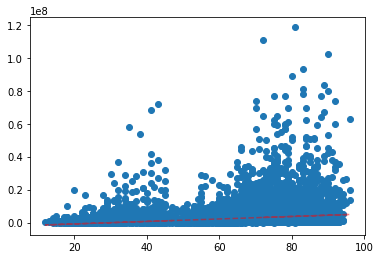

In [88]:
# Your code here:

slope, intercept, r_squared, p_value, std_err = linregress(
    fifa['Stamina'],
    fifa['ValueNumeric']    
)

print("How Stamina Affects Value\n")
print("Slope:",slope)
print("Intercept:",intercept)
print("R-Squared:",r_squared)
print("P-Value:", p_value)
print("Standard Error:", std_err)

plt.scatter(fifa['Stamina'],fifa['ValueNumeric'])

plt.plot(
    fifa['Stamina'],
    (slope * fifa['Stamina']) + intercept, #y = mx + b
    color = 'red',
    alpha = .5,
    linestyle = '--'
)

How Sprint Speed Affects Value

Slope = 66834.28646112487
Intercept = -1876931.1758533535
R-Squared = 0.17404692441061137
P-Value = 7.284984571171899e-122
Standard Error = 2825.0936604289486


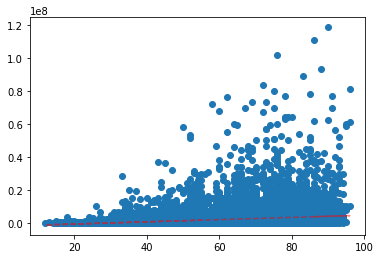

In [84]:
# Your code here:

slope, intercept, r_squared, p_value, std_err = linregress(
    fifa['SprintSpeed'],
    fifa['ValueNumeric']    
)

print("How Sprint Speed Affects Value\n")
print("Slope:",slope)
print("Intercept:",intercept)
print("R-Squared:",r_squared)
print("P-Value:", p_value)
print("Standard Error:", std_err)

plt.scatter(fifa['SprintSpeed'],fifa['ValueNumeric'])

plt.plot(
    fifa['SprintSpeed'],
    (slope * fifa['SprintSpeed']) + intercept, #y = mx + b
    color = 'red',
    alpha = .5,
    linestyle = '--'
)

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# Your conclusions here:
# Given the r-squared for both relationships of stamina and speed to value, it shows that either of those 2 variables
# have a meaningful influence on value


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [89]:
# Your code here:

slope, intercept, r_squared, p_value, std_err = linregress(
    fifa['Potential'],
    fifa['ValueNumeric']    
)

print("How Potential Affects Value\n")
print("Slope:",slope)
print("Intercept:",intercept)
print("R-Squared:",r_squared)
print("P-Value:", p_value)
print("Standard Error:", std_err)


How Potential Affects Value

Slope: 531165.039345017
Intercept: -35439019.551347256
R-Squared: 0.5794821249327765
P-Value: 0.0
Standard Error: 5581.083240309876


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:
# Given the previous r-squares of stamina and speed, potential seems to have a more meaningful relationship to value


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

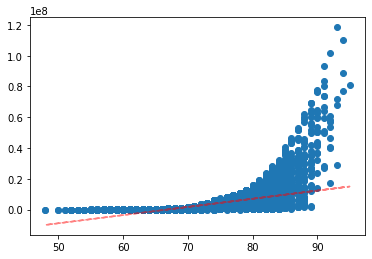

In [86]:
# Your code here:

plt.scatter(fifa['Potential'],fifa['ValueNumeric'])

plt.plot(
    fifa['Potential'],
    (slope * fifa['Potential']) + intercept, #y = mx + b
    color = 'red',
    alpha = .5,
    linestyle = '--'
)


In [90]:
# No, the relationship between the model and the data do not relate as the model is linear while the data seems to 
# have an exponential relationship